In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import gmaps
from sklearn import preprocessing
plt.rc("font", size=14)
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import statsmodels

In [4]:
#import csv file
data=pd.read_csv("/Users/ioanahancu/Desktop/Food_Inspections.csv")

In [5]:
data.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2345928,ALBANY CHILD CARE CENTER,ALBANY CHILD CARE CENTER,2215697.0,Daycare Above and Under 2 Years,Risk 1 (High),5954 S ALBANY AVE,CHICAGO,IL,60629.0,11/19/2019,Canvass,Pass,"55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ...",41.784667,-87.701011,"(41.784667360966026, -87.7010111792713)"
1,2240486,TAMALES EMMA LA CHAPARRITA,LA CHAPARRITA,2501598.0,Restaurant,Risk 1 (High),2500 S WHIPPLE ST,CHICAGO,IL,60623.0,11/20/2018,Complaint,Fail,"1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOW...",41.846288,-87.701562,"(41.846287752477586, -87.70156191989919)"
2,2078297,CHARTWELLS,MANSUETO HIGH SCHOOL,2549059.0,HIGH SCHOOL KITCHEN,Risk 1 (High),2911 W W 47TH ST,CHICAGO,IL,60632.0,08/11/2017,License,Pass,NaN,NaN,NaN,NaN
3,2369894,"JIMMY'S FOOD & DELI,INC",JIMMY'S FOOD & DELI,2511672.0,Grocery Store,Risk 2 (Medium),5601 W MADISON ST,CHICAGO,IL,60644.0,04/29/2020,Canvass,Fail,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.880135,-87.764942,"(41.880135062255434, -87.7649424467103)"
4,2184537,MYSORE WOODLANDS,MYSORE WOODLANDS,2229409.0,Restaurant,Risk 1 (High),2548-2550 W DEVON AVE,CHICAGO,IL,60659.0,07/12/2018,Canvass,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.997765,-87.694284,"(41.9977653535896, -87.69428406894727)"


In [6]:
#look at the number or rows and columns in the dataset
print(data.shape)

(208254, 17)


In [7]:
#check if there are any null values
data.isnull().values.any()

True

In [8]:
#view all the columns that have null values
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

AKA Name            2479
License #             17
Facility Type       4861
Risk                  73
City                 150
State                 48
Zip                   50
Inspection Type        1
Violations         55325
Latitude             688
Longitude            688
Location             688
dtype: int64

In [10]:
#look at specific column that have nulls
print(data[data["License #"].isnull()][null_columns])

                               AKA Name  License #  \
18504              ST. DEMETRIOS CHURCH        NaN   
34322              ST. DEMETRIOS CHURCH        NaN   
44385              ST. DEMETRIOS CHURCH        NaN   
46658   GOD'S BATTLE AXE PRAYER ACADEMY        NaN   
46802                   ARGENTINA FOODS        NaN   
58588              ST. DEMETRIOS CHURCH        NaN   
87997   GOD'S BATTLE AXE PRAYER ACADEMY        NaN   
99520              ST. DEMETRIOS CHURCH        NaN   
115407         OLD ST. PATRICK'S CHURCH        NaN   
131995                              NaN        NaN   
151006         OLD ST. PATRICK'S CHURCH        NaN   
152958             ST. DEMETRIOS CHURCH        NaN   
156206  GOD'S BATTLE AXE PRAYER ACADEMY        NaN   
173769                              NaN        NaN   
182102             ST. DEMETRIOS CHURCH        NaN   
184207             ST. DEMETRIOS CHURCH        NaN   
192512             ST. DEMETRIOS CHURCH        NaN   

                      Facil

In [9]:
# filter the dataset by facility type =restaurant and look at its shape
restaurant_data = data[data['Facility Type']=="Restaurant"]
print(restaurant_data.shape)

(138590, 17)


In [ ]:
restaurant_data.head()

In [10]:
# we want to keep just the restaurants where we know the location, so we keep just the rows where location is not NaN:
restaurants_df = restaurant_data[restaurant_data['Location'].notna()]
restaurants_df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
1,2240486,TAMALES EMMA LA CHAPARRITA,LA CHAPARRITA,2501598.0,Restaurant,Risk 1 (High),2500 S WHIPPLE ST,CHICAGO,IL,60623.0,11/20/2018,Complaint,Fail,"1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOW...",41.846288,-87.701562,"(41.846287752477586, -87.70156191989919)"
4,2184537,MYSORE WOODLANDS,MYSORE WOODLANDS,2229409.0,Restaurant,Risk 1 (High),2548-2550 W DEVON AVE,CHICAGO,IL,60659.0,07/12/2018,Canvass,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.997765,-87.694284,"(41.9977653535896, -87.69428406894727)"
8,2240666,ORANGE GARDEN RESTAURANT LLC,ORANGE GARDEN RESTAURANT LLC,1942679.0,Restaurant,Risk 1 (High),1942 W IRVING PARK RD,CHICAGO,IL,60613.0,11/27/2018,Canvass,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.954276,-87.678033,"(41.954276019666246, -87.6780332991192)"
9,2280082,BEERHEAD BAR & EATERY,BEERHEAD BAR & EATERY,2600994.0,Restaurant,Risk 1 (High),3519 N CLARK ST,CHICAGO,IL,60657.0,03/26/2019,License,Pass,"55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ...",41.946281,-87.655603,"(41.94628081101039, -87.65560312808297)"
10,2370625,THE CREPE SHOP,THE CREPE SHOP,2699005.0,Restaurant,Risk 1 (High),2934 N BROADWAY,CHICAGO,IL,60657.0,05/15/2020,Canvass,Pass,37. FOOD PROPERLY LABELED; ORIGINAL CONTAINER ...,41.935930,-87.644407,"(41.93592957402078, -87.64440716256712)"


In [11]:
#find out how many unique zip codes we have in our dataset:
len(restaurants_df['Zip'].unique().tolist())

60

In [12]:
#make sure there are no more null values in the "location" column
null_columns=restaurants_df.columns[restaurants_df.isnull().any()]
data[null_columns].isnull().sum()

AKA Name            2479
Risk                  73
City                 150
State                 48
Zip                   50
Inspection Type        1
Violations         55325
dtype: int64

In [ ]:
# Export the restaurants data into a csv. i've comment this out because I don't want to save the file multiple times on my machine
#restaurants_df.to_csv("Restaurants.csv")

In [13]:
#look at how many unique restaurants are out there, based on location
len(restaurants_df['Location'].unique().tolist())

9523

In [15]:
# eliminate restaurants that are "out of business" or "business not located"
clean_data=restaurants_df[(restaurants_df['Results'] != 'Out of Business') & (restaurants_df['Results'] != 'Business Not Located')]

In [16]:
#find out how many unique restaurant locations we have in our dataset:
len(clean_data['Location'].unique().tolist())

9380

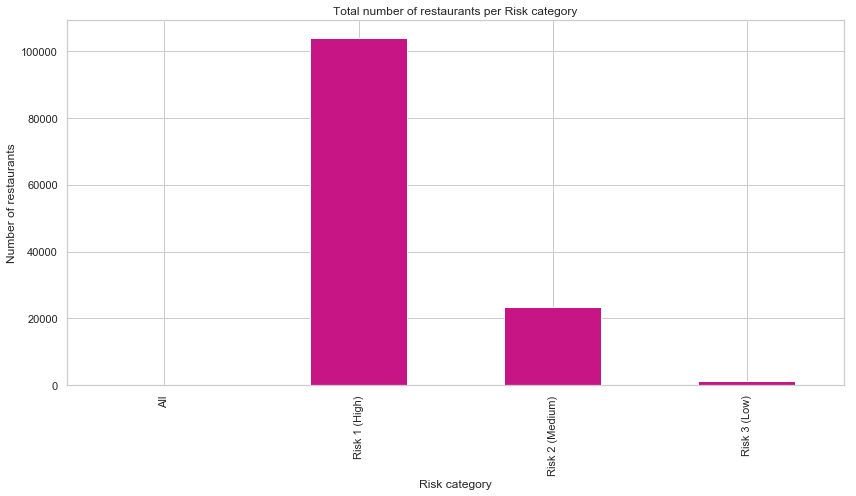

In [65]:
# Generate a bar plot showing the total number of restaurants for each Risk category 

#First, we use groupby "risk category" and count location to determine the data points
risk_data_points = clean_data.groupby(["Risk"]).count()["Location"]
risk_data_points

#Second, we plot the points
risk_data_points.plot(kind="bar", color="mediumvioletred", figsize=(12,7))

#Last, we set chart title and axis labels
plt.title("Total number of restaurants per Risk category")
plt.xlabel("Risk category")
plt.ylabel("Number of restaurants")

#show chart and set layout
plt.tight_layout()
plt.savefig("NbOfRestaurantsPerRiskCategory.png")
plt.show()

In [20]:
#We can see that most restaurants are at high risk. We can also confirm this from the data:
clean_data['Risk'].value_counts()

Risk 1 (High)      103971
Risk 2 (Medium)     23467
Risk 3 (Low)         1350
All                     8
Name: Risk, dtype: int64

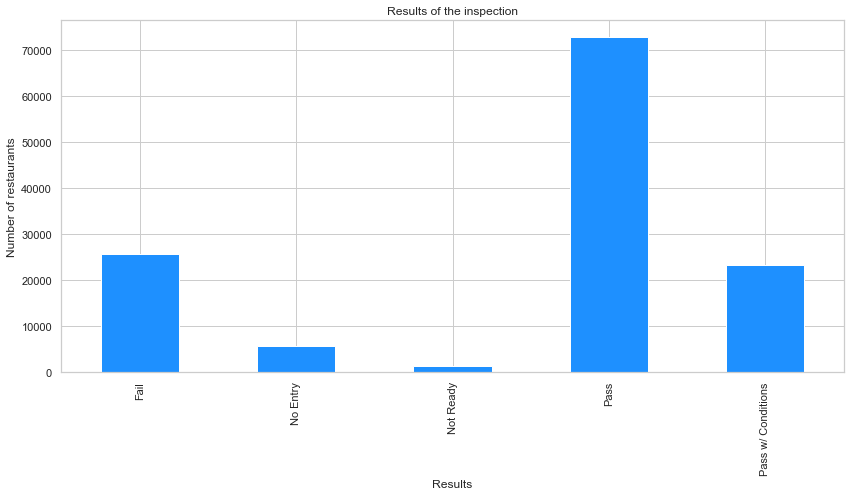

In [66]:
#Next, we look at the results of the inspections

#First, we use groupby "Results" and count location to determine the data points
risk_data_points = clean_data.groupby(["Results"]).count()["Location"]
risk_data_points

#Second, we plot the points
risk_data_points.plot(kind="bar", color="dodgerblue", figsize=(12,7))

#Last, we set chart title and axis labels
plt.title("Results of the inspection")
plt.xlabel("Results")
plt.ylabel("Number of restaurants")

#show chart and set layout

plt.tight_layout()
plt.savefig("Results of inspections.png")
plt.show()

In [19]:
#confirm from the data:
clean_data['Results'].value_counts()

Pass                  72792
Fail                  25735
Pass w/ Conditions    23220
No Entry               5678
Not Ready              1374
Name: Results, dtype: int64

In [23]:
clean_data.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
1,2240486,TAMALES EMMA LA CHAPARRITA,LA CHAPARRITA,2501598.0,Restaurant,Risk 1 (High),2500 S WHIPPLE ST,CHICAGO,IL,60623.0,11/20/2018,Complaint,Fail,"1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOW...",41.846288,-87.701562,"(41.846287752477586, -87.70156191989919)"
4,2184537,MYSORE WOODLANDS,MYSORE WOODLANDS,2229409.0,Restaurant,Risk 1 (High),2548-2550 W DEVON AVE,CHICAGO,IL,60659.0,07/12/2018,Canvass,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.997765,-87.694284,"(41.9977653535896, -87.69428406894727)"
8,2240666,ORANGE GARDEN RESTAURANT LLC,ORANGE GARDEN RESTAURANT LLC,1942679.0,Restaurant,Risk 1 (High),1942 W IRVING PARK RD,CHICAGO,IL,60613.0,11/27/2018,Canvass,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.954276,-87.678033,"(41.954276019666246, -87.6780332991192)"
9,2280082,BEERHEAD BAR & EATERY,BEERHEAD BAR & EATERY,2600994.0,Restaurant,Risk 1 (High),3519 N CLARK ST,CHICAGO,IL,60657.0,03/26/2019,License,Pass,"55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ...",41.946281,-87.655603,"(41.94628081101039, -87.65560312808297)"
10,2370625,THE CREPE SHOP,THE CREPE SHOP,2699005.0,Restaurant,Risk 1 (High),2934 N BROADWAY,CHICAGO,IL,60657.0,05/15/2020,Canvass,Pass,37. FOOD PROPERLY LABELED; ORIGINAL CONTAINER ...,41.935930,-87.644407,"(41.93592957402078, -87.64440716256712)"


In [20]:
#Drop the rows where Risk= All or where we have nan and only keep high, medium or low risk
final_dataset=clean_data[clean_data.Risk!='All']
final_dataset['Risk'].unique()

array(['Risk 1 (High)', 'Risk 2 (Medium)', 'Risk 3 (Low)', nan],
      dtype=object)

In [21]:
final_risk=final_dataset[final_dataset.Risk.notnull()]
final_risk['Risk'].unique()

array(['Risk 1 (High)', 'Risk 2 (Medium)', 'Risk 3 (Low)'], dtype=object)

In [ ]:
#Logistic Regression

In [ ]:
# Next, we want to see if there is a correlation between Risk Category and Inspection Results.
# How good is risk category at predicting if a restaurant is going to pass/fail the inspections?

In [22]:
print(list(final_risk.columns))

['Inspection ID', 'DBA Name', 'AKA Name', 'License #', 'Facility Type', 'Risk', 'Address', 'City', 'State', 'Zip', 'Inspection Date', 'Inspection Type', 'Results', 'Violations', 'Latitude', 'Longitude', 'Location']


In [23]:
#We know that logistic regression requires our response variable to be binary. For this analysis, we will consider "Pass" and Pass w/Conditions" as Pass(1)
#and "Fail", "Not Ready" and "No Entry" as Fail(0)

results_numerical = {"Results" :{"Pass": 1, "Pass w/ Conditions": 1, "Fail":0, "Not Ready":0, "No Entry":0}}
print(results_numerical)

{'Results': {'Pass': 1, 'Pass w/ Conditions': 1, 'Fail': 0, 'Not Ready': 0, 'No Entry': 0}}


In [24]:
final_df=final_risk.replace(results_numerical)
final_df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
1,2240486,TAMALES EMMA LA CHAPARRITA,LA CHAPARRITA,2501598.0,Restaurant,Risk 1 (High),2500 S WHIPPLE ST,CHICAGO,IL,60623.0,11/20/2018,Complaint,0,"1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOW...",41.846288,-87.701562,"(41.846287752477586, -87.70156191989919)"
4,2184537,MYSORE WOODLANDS,MYSORE WOODLANDS,2229409.0,Restaurant,Risk 1 (High),2548-2550 W DEVON AVE,CHICAGO,IL,60659.0,07/12/2018,Canvass,1,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.997765,-87.694284,"(41.9977653535896, -87.69428406894727)"
8,2240666,ORANGE GARDEN RESTAURANT LLC,ORANGE GARDEN RESTAURANT LLC,1942679.0,Restaurant,Risk 1 (High),1942 W IRVING PARK RD,CHICAGO,IL,60613.0,11/27/2018,Canvass,1,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.954276,-87.678033,"(41.954276019666246, -87.6780332991192)"
9,2280082,BEERHEAD BAR & EATERY,BEERHEAD BAR & EATERY,2600994.0,Restaurant,Risk 1 (High),3519 N CLARK ST,CHICAGO,IL,60657.0,03/26/2019,License,1,"55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ...",41.946281,-87.655603,"(41.94628081101039, -87.65560312808297)"
10,2370625,THE CREPE SHOP,THE CREPE SHOP,2699005.0,Restaurant,Risk 1 (High),2934 N BROADWAY,CHICAGO,IL,60657.0,05/15/2020,Canvass,1,37. FOOD PROPERLY LABELED; ORIGINAL CONTAINER ...,41.935930,-87.644407,"(41.93592957402078, -87.64440716256712)"


In [25]:
# Covert Risk column to numerical:
risk_numerical = {"Risk" :{"Risk 1 (High)": 1, "Risk 2 (Medium)": 2, "Risk 3 (Low)":3 }}
print(risk_numerical)


{'Risk': {'Risk 1 (High)': 1, 'Risk 2 (Medium)': 2, 'Risk 3 (Low)': 3}}


In [26]:
final_data=final_df.replace(risk_numerical)
final_data.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
1,2240486,TAMALES EMMA LA CHAPARRITA,LA CHAPARRITA,2501598.0,Restaurant,1,2500 S WHIPPLE ST,CHICAGO,IL,60623.0,11/20/2018,Complaint,0,"1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOW...",41.846288,-87.701562,"(41.846287752477586, -87.70156191989919)"
4,2184537,MYSORE WOODLANDS,MYSORE WOODLANDS,2229409.0,Restaurant,1,2548-2550 W DEVON AVE,CHICAGO,IL,60659.0,07/12/2018,Canvass,1,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.997765,-87.694284,"(41.9977653535896, -87.69428406894727)"
8,2240666,ORANGE GARDEN RESTAURANT LLC,ORANGE GARDEN RESTAURANT LLC,1942679.0,Restaurant,1,1942 W IRVING PARK RD,CHICAGO,IL,60613.0,11/27/2018,Canvass,1,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.954276,-87.678033,"(41.954276019666246, -87.6780332991192)"
9,2280082,BEERHEAD BAR & EATERY,BEERHEAD BAR & EATERY,2600994.0,Restaurant,1,3519 N CLARK ST,CHICAGO,IL,60657.0,03/26/2019,License,1,"55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ...",41.946281,-87.655603,"(41.94628081101039, -87.65560312808297)"
10,2370625,THE CREPE SHOP,THE CREPE SHOP,2699005.0,Restaurant,1,2934 N BROADWAY,CHICAGO,IL,60657.0,05/15/2020,Canvass,1,37. FOOD PROPERLY LABELED; ORIGINAL CONTAINER ...,41.935930,-87.644407,"(41.93592957402078, -87.64440716256712)"


In [27]:
#univariate logistic regression
#define our X and Y
Y=list(final_data['Results'])
X=list(final_data['Risk'])

In [31]:
print(Y)

[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 

In [32]:
print(X)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 

In [28]:
data=final_data[['Risk','Results']]
data

,Risk,Results
1,1,0
4,1,1
8,1,1
9,1,1
10,1,1
...,...,...
208246,1,1
208250,1,1
208251,2,1
208252,1,1


,Risk,Results
1,1,0
4,1,1
8,1,1
9,1,1
10,1,1
...,...,...
208246,1,1
208250,1,1
208251,2,1
208252,1,1


In [29]:
#create samples
from imblearn.over_sampling import SMOTE
os=SMOTE(random_state=0)
Risk_train, Risk_test, Results_train, Results_test= train_test_split(data['Risk'],data['Results'], test_size=0.3, random_state=0)

In [36]:
#os_data_x, os_data_y=os.fit_sample((pd.DataFrame(Risk_train),pd.DataFrame(Results_train)))
#os_data_x=data.DataFrame(data=data, columns='Risk')
#os_data_y=data.DataFrame(data=data, columns="Results")

In [43]:
import statsmodels.api as sm
logit_model=sm.Logit(data['Results'],data['Risk'])
result=logit_model.fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.576965
         Iterations 5
                          Results: Logit
Model:              Logit            Pseudo R-squared: -0.017     
Dependent Variable: Results          AIC:              148614.3378
Date:               2020-07-22 21:17 BIC:              148624.1037
No. Observations:   128788           Log-Likelihood:   -74306.    
Df Model:           0                LL-Null:          -73051.    
Df Residuals:       128787           LLR p-value:      nan        
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     5.0000                                        
---------------------------------------------------------------------
         Coef.     Std.Err.       z        P>|z|     [0.025    0.975]
---------------------------------------------------------------------
Risk     0.8367      0.0053    157.1043    0.0000    0.8263    0.8471



In [70]:
#Test the model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
Risk_train, Risk_test, Results_train, Results_test = train_test_split(data['Risk'], data['Results'], test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(pd.DataFrame(Risk_train),Results_train)
Results_pred = logreg.predict(pd.DataFrame(Risk_test))
Results_pred

array([1, 1, 1, ..., 1, 1, 1])

In [72]:
# Check the accuracy
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(pd.DataFrame(Risk_test),pd.DataFrame (Results_test))))

Accuracy of logistic regression classifier on test set: 0.75


In [79]:
# Build the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(pd.DataFrame(Results_test), pd.DataFrame(Results_pred))
print(confusion_matrix)


[[    0  9800]
 [    0 28837]]


In [86]:
from sklearn.metrics import classification_report
print(classification_report(pd.DataFrame(Results_test), pd.DataFrame(Results_pred)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9800
           1       0.75      1.00      0.85     28837

    accuracy                           0.75     38637
   macro avg       0.37      0.50      0.43     38637
weighted avg       0.56      0.75      0.64     38637



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
